## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Better Activation

In [3]:
# solution 2: BetteActivationFunction

initializer = tf.keras.initializers.RandomNormal()

#################### YOUR CODE HERE ####################
# Các bạn thực hiện code (tùy ý tinh chỉnh) để sau môi 
# hidden layer sẽ là ReLU activation function
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(10))
########################################################

# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
118/118 - 5s - loss: 1.1096 - accuracy: 0.6076 - val_loss: 0.8095 - val_accuracy: 0.7060 - 5s/epoch - 46ms/step
Epoch 2/150
118/118 - 3s - loss: 0.6440 - accuracy: 0.7640 - val_loss: 0.6419 - val_accuracy: 0.7575 - 3s/epoch - 23ms/step
Epoch 3/150
118/118 - 2s - loss: 0.5590 - accuracy: 0.7967 - val_loss: 0.7203 - val_accuracy: 0.7186 - 2s/epoch - 18ms/step
Epoch 4/150
118/118 - 2s - loss: 0.5131 - accuracy: 0.8152 - val_loss: 0.5644 - val_accuracy: 0.7924 - 2s/epoch - 17ms/step
Epoch 5/150
118/118 - 2s - loss: 0.4787 - accuracy: 0.8271 - val_loss: 0.4699 - val_accuracy: 0.8329 - 2s/epoch - 17ms/step
Epoch 6/150
118/118 - 2s - loss: 0.4603 - accuracy: 0.8333 - val_loss: 0.6138 - val_accuracy: 0.7858 - 2s/epoch - 17ms/step
Epoch 7/150
118/118 - 2s - loss: 0.4431 - accuracy: 0.8413 - val_loss: 0.5068 - val_accuracy: 0.8012 - 2s/epoch - 17ms/step
Epoch 8/150
118/118 - 2s - loss: 0.4268 - accuracy: 0.8443 - val_loss: 0.5998 - val_accuracy: 0.7825 - 2s/epoch - 17ms/step
Epoch 9/

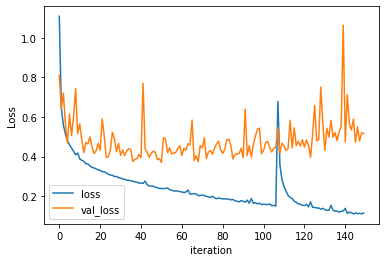

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

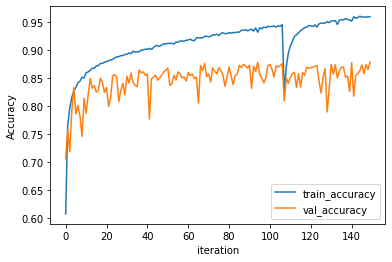

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

## (Optional) Better Activation (lr=0.05)

In [6]:
# solution 2: BetteActivationFunction reduce LR

initializer = tf.keras.initializers.RandomNormal()

#################### YOUR CODE HERE ####################
# Các bạn thực hiện code (tùy ý tinh chỉnh) để sau môi 
# hidden layer sẽ là ReLU activation function
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(10))
########################################################


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(0.005), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
118/118 - 3s - loss: 1.2138 - accuracy: 0.5882 - val_loss: 0.9556 - val_accuracy: 0.6603 - 3s/epoch - 26ms/step
Epoch 2/150
118/118 - 2s - loss: 0.7443 - accuracy: 0.7289 - val_loss: 0.7080 - val_accuracy: 0.7533 - 2s/epoch - 18ms/step
Epoch 3/150
118/118 - 2s - loss: 0.6348 - accuracy: 0.7725 - val_loss: 0.7268 - val_accuracy: 0.7251 - 2s/epoch - 17ms/step
Epoch 4/150
118/118 - 2s - loss: 0.5732 - accuracy: 0.7946 - val_loss: 0.5934 - val_accuracy: 0.7874 - 2s/epoch - 17ms/step
Epoch 5/150
118/118 - 2s - loss: 0.5406 - accuracy: 0.8066 - val_loss: 0.6296 - val_accuracy: 0.7755 - 2s/epoch - 17ms/step
Epoch 6/150
118/118 - 2s - loss: 0.5163 - accuracy: 0.8163 - val_loss: 0.6226 - val_accuracy: 0.7813 - 2s/epoch - 17ms/step
Epoch 7/150
118/118 - 2s - loss: 0.4929 - accuracy: 0.8251 - val_loss: 0.5625 - val_accuracy: 0.7891 - 2s/epoch - 17ms/step
Epoch 8/150
118/118 - 2s - loss: 0.4715 - accuracy: 0.8324 - val_loss: 0.5393 - val_accuracy: 0.8078 - 2s/epoch - 17ms/step
Epoch 9/

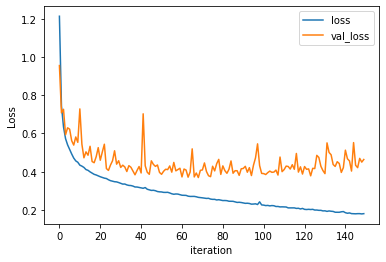

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

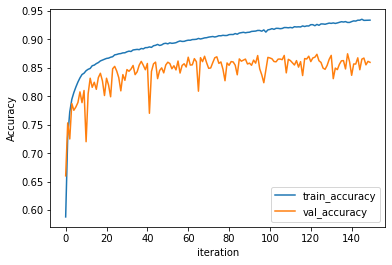

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()